This notebook runs Ora, GSEA, Enrichr and PET under Benchmark.

In [26]:
import os, sys
import pandas as pd
from PET import *
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data_dir = '../data/prerank_DESeq2/'
all_rank_file = os.listdir(data_dir)
all_rank_file.sort()

In [28]:
# run GSEA
gsea_result_dir = '../example_results/GSEA_results/'
for file in all_rank_file:
    target = file.split('.')[0]
    run_GSEA(prerank_file_path=data_dir+file, out_dir=gsea_result_dir, thread_num=20,
         pathway_file='../pathway_files/K562_DESEq2.gmt', no_plot=True,
         min_size=15, max_size=500)
    # rename the GSEA report file
    os.system('mv '+gsea_result_dir+'/gseapy.gene_set.prerank.report.csv '+gsea_result_dir+'/'+target+'.gsea.csv')

2024-05-29 18:08:00,796 [WARNING] Duplicated values found in preranked stats: 73.85% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-05-29 18:08:00,797 [INFO] Parsing data files for GSEA.............................
2024-05-29 18:08:00,824 [INFO] 0000 gene_sets have been filtered out when max_size=500 and min_size=15
2024-05-29 18:08:00,825 [INFO] 0197 gene_sets used for further statistical testing.....
2024-05-29 18:08:00,825 [INFO] Start to run GSEA...Might take a while..................
2024-05-29 18:08:11,018 [INFO] Start to generate gseapy reports, and produce figures...
2024-05-29 18:08:11,019 [INFO] Congratulations. GSEApy runs successfully................

2024-05-29 18:08:11,307 [WARNING] Duplicated values found in preranked stats: 57.37% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-05-29 18:08:11,308 [INFO] Parsing data files for GSEA.............................
2024-05-29 18:0

In [29]:
# read pathway information for Ora and enrichr
pathway_dict = read_gmt('../pathway_files/K562_DESEq2.gmt')

In [30]:
# get top 200 DEGs from rank file
deg_dict = dict()
for file in all_rank_file:
    target = file.split('.')[0]
    deg_dict[target] = extract_deg_rnk(data_dir+file, deg_num=200, ascending=False)

In [31]:
gene_universe = set(pd.read_csv(data_dir+file, sep='\t', header=None)[0])

In [32]:
# run ORA 
ora_result_dir = '../example_results/Ora_results/'
run_ora(pathway_dict=pathway_dict, deg_dict = deg_dict,
        gene_universe_num=len(gene_universe), out_dir=ora_result_dir)


Running ORA for genes in  AARS
Results written to  ../example_results/Ora_results//AARS.ora_result.txt
********************
Running ORA for genes in  AATF
Results written to  ../example_results/Ora_results//AATF.ora_result.txt
********************
Running ORA for genes in  ABCF1
Results written to  ../example_results/Ora_results//ABCF1.ora_result.txt
********************
Running ORA for genes in  ADAR
Results written to  ../example_results/Ora_results//ADAR.ora_result.txt
********************
Running ORA for genes in  AGO1
Results written to  ../example_results/Ora_results//AGO1.ora_result.txt
********************
Running ORA for genes in  AKAP1
Results written to  ../example_results/Ora_results//AKAP1.ora_result.txt
********************
Running ORA for genes in  AKAP8
Results written to  ../example_results/Ora_results//AKAP8.ora_result.txt
********************
Running ORA for genes in  AKAP8L
Results written to  ../example_results/Ora_results//AKAP8L.ora_result.txt
*******************

In [33]:
# Run Enrichr 
enrichr_result_dir = '../example_results/Enrichr_results/'

run_enrichr(pathway_dict=pathway_dict, deg_dict=deg_dict,
            gene_universe=gene_universe, 
            permutation_num=1000, permutation_file_name=enrichr_result_dir+'enrichr_kegg_permutation_1000.txt',
            out_dir=enrichr_result_dir)

Running Enrichr for genes in  AARS
../example_results/Enrichr_results/enrichr_kegg_permutation_1000.txt does not exist, initializing permutation
Permutation 0
Permutation 50
Permutation 100
Permutation 150
Permutation 200
Permutation 250
Permutation 300
Permutation 350
Permutation 400
Permutation 450
Permutation 500
Permutation 550
Permutation 600
Permutation 650
Permutation 700
Permutation 750
Permutation 800
Permutation 850
Permutation 900
Permutation 950
Permutation result written to  ../example_results/Enrichr_results/enrichr_kegg_permutation_1000.txt
Results written to  ../example_results/Enrichr_results//AARS.enrichr_result.txt
********************
Running Enrichr for genes in  AATF
../example_results/Enrichr_results/enrichr_kegg_permutation_1000.txt already exists, reading file now...
Results written to  ../example_results/Enrichr_results//AATF.enrichr_result.txt
********************
Running Enrichr for genes in  ABCF1
../example_results/Enrichr_results/enrichr_kegg_permutation_

In [34]:
pet_out_dir = '../example_results/PET_results/'
for file in all_rank_file:
    target = file.split('.')[0]
    run_PET(ora_result_file=ora_result_dir+target+'.ora_result.txt', 
            enrichr_result_file=enrichr_result_dir+target+'.enrichr_result.txt', 
            gsea_result_file=gsea_result_dir+target+'.gsea.csv', 
            pathway_dict = pathway_dict,
            out_dir = pet_out_dir, gsea_pos_label='pos', file_prefix=target)

GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to  ../example_results/PET_results//AARS.PET.txt
GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to  ../example_results/PET_results//AATF.PET.txt
GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to  ../example_results/PET_results//ABCF1.PET.txt
GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to  ../example_results/PET_results//ADAR.PET.txt
GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to 

In [35]:
# summarize results from Ora, enrichr, GSEApy and PET
all_pet_results = os.listdir(pet_out_dir)
all_pet_results.sort()
rank_dict = dict()
methods = ['PET', 'Enrichr', 'GSEA', 'ora']
for m in methods:
    rank_dict[m] = dict()
for file in all_pet_results:
    target = file.split('.')[0]
    df = pd.read_csv(pet_out_dir+file, sep='\t', index_col=0)
    for m in methods:
        rank_dict[m][target] = int(df.loc[target][m+' rank'])

In [51]:
rank_df = pd.DataFrame.from_dict(rank_dict)
for m in methods:
    rank_df[m].to_csv('../example_results/'+m+'_result.txt', sep='\t', header=None)

In [45]:
# plot all results
result_dfs = []
result_dir = '../Benchmark_results/'
methods = ['PET', 'Enrichr', 'GSEA', 'ora']
for m in methods:
    res_df = pd.read_csv(result_dir+m+'_result.txt', sep='\t', header=None, index_col=0)
    result_dfs.append(res_df)
# combine the results
all_result_df = pd.concat(result_dfs, axis=1)
all_result_df.columns = methods
all_result_df

,PET,Enrichr,GSEA,ora
0,,,,
AARS,1,1,3,3
AATF,1,4,6,2
ABCF1,6,16,13,47
ADAR,1,1,1,1
AGO1,1,4,1,1
...,...,...,...,...
XRCC6,1,1,2,13
XRN2,2,1,20,6
YBX3,1,1,1,1


In [46]:
def apk(predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average precision at k between two lists of items.
    """
    total_num = len(predicted)
    precision_list = []
    for idx in range(k):
        precision_list.append(np.where(predicted<=idx+1)[0].shape[0]/total_num)
        # print(np.where(predicted<=idx+1)[0].shape[0])
    # return P@10 and AP@10
    return precision_list[-1], np.mean(precision_list)

<Axes: ylabel='Ground truth pathway rank'>

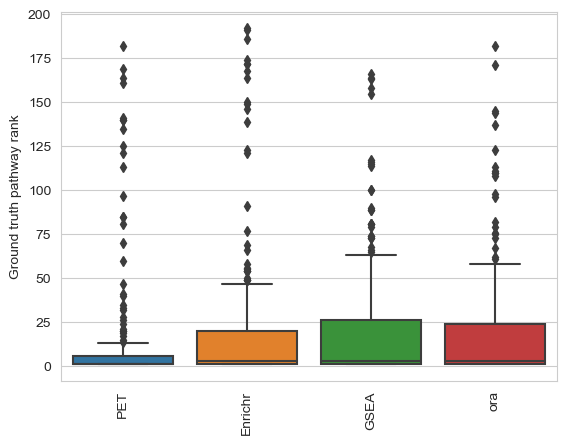

In [47]:
# plot the results
plt.xticks(rotation=90)
plt.ylabel('Ground truth pathway rank')
sns.boxplot(data=all_result_df)

<Axes: ylabel='Proportion'>

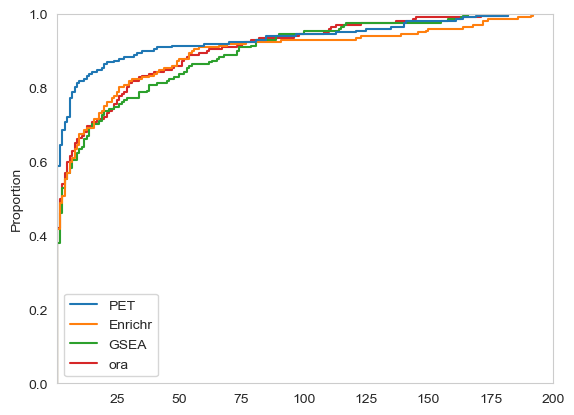

In [48]:
plt.grid(False)
plt.xlim(1, 200)
# plt.ylim(0, 100)
sns.ecdfplot(data=all_result_df, stat='proportion')

In [49]:
for method in all_result_df.columns:
    print('-'*20)
    print(method, 'summary:')
    print('Median rank: ', all_result_df[method].median())
    print('Precision@10: ', apk(all_result_df[method])[0])
    print('Average Precision@10: ', apk(all_result_df[method])[1])

--------------------
PET summary:
Median rank:  1.0
Precision@10:  0.817258883248731
Average Precision@10:  0.7335025380710659
--------------------
Enrichr summary:
Median rank:  3.0
Precision@10:  0.6751269035532995
Average Precision@10:  0.5695431472081218
--------------------
GSEA summary:
Median rank:  3.0
Precision@10:  0.6345177664974619
Average Precision@10:  0.5543147208121827
--------------------
ora summary:
Median rank:  3.0
Precision@10:  0.6649746192893401
Average Precision@10:  0.5842639593908628
